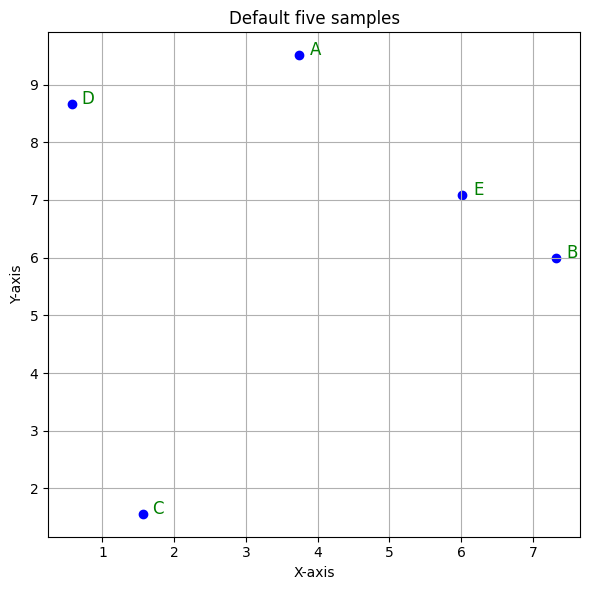

In [1]:
# ============================================================================
# Author: pf.zh
# Date: 2024-12-08
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Coordinates for 5 points in 2D space (can modify as needed)
coordinates = np.random.rand(5, 2) * 10  # Generate 5 points with random coordinates

# Plotting the points
plt.figure(figsize=(6,6))
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue')

# Labeling the points A, B, C, D, E, with adjusted position and different color
for i, label in enumerate(['A', 'B', 'C', 'D', 'E']):
    plt.text(coordinates[i, 0] + 0.3, coordinates[i, 1] + 0, label, fontsize=12, ha='right', color='green')

# Adding grid and labels
plt.title("Default five samples")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
# 去掉两侧的空白
plt.tight_layout()  # 自动调整子图参数以使图像更紧凑
plt.savefig('output/hierarchy-fig1.png', bbox_inches='tight')
# Show the plot
plt.show()


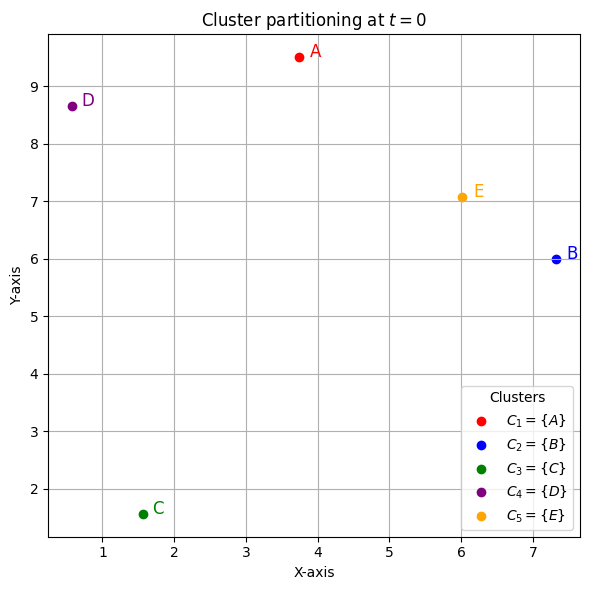

In [2]:

# Labels for the clusters and points
cluster_labels = ['C_1', 'C_2', 'C_3', 'C_4', 'C_5']
point_labels = ['A', 'B', 'C', 'D', 'E']

cluster2points = {cluster_labels[i]: [point_labels[i]] for i in range(len(cluster_labels))}

# List of colors for the 5 different clusters
colors = ['red', 'blue', 'green', 'purple', 'orange']

x, y = coordinates[:, 0], coordinates[:, 1]
# Plotting the points
plt.figure(figsize=(6,6))

def get_cluster(target):
    for key, value in cluster2points.items():
        if target in value:
            return key
    return None

# Labeling the points A, B, C, D, E, with adjusted position and different color
for i, label in enumerate(['A', 'B', 'C', 'D', 'E']):
    cluster_name = get_cluster(label)
    cluster_member = '\{' + ','.join(cluster2points[cluster_name]) + '\}'
    plt.scatter(x[i], y[i], color=colors[i], label = f'${cluster_name}={cluster_member}$')
    plt.text(coordinates[i, 0] + 0.3, coordinates[i, 1] + 0, label, color=colors[i], fontsize=12, ha='right')

# Adding grid and labels
plt.title("Cluster partitioning at $t=0$")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)

plt.legend(title="Clusters", loc="lower right")

# 去掉两侧的空白
plt.tight_layout()  # 自动调整子图参数以使图像更紧凑
plt.savefig('output/hierarchy-fig2.png', bbox_inches='tight')

# Show the plot
plt.show()

In [3]:
import numpy as np

# 计算欧几里得距离的函数
def calculate_distance(X):
    n = len(X)
    distances = np.zeros((n, n))  # 初始化二维距离矩阵
    for i in range(n):
        for j in range(i + 1, n):
            dist = np.linalg.norm(X[i] - X[j])  # 计算欧几里得距离
            distances[i, j] = dist
            distances[j, i] = dist  # 距离矩阵是对称的
    return distances

# 层次聚类算法
def agglomerative_clustering(X, labels, k=3):
    n = len(X)
    distances = calculate_distance(X)  # 计算所有点之间的距离
    clusters = [[i] for i in range(n)]  # 每个点开始时是一个独立的簇
    cluster2points = {i: [i] for i in range(n)}  # 初始时，每个点属于一个簇
    merge_history = []  # 用于存储每次合并的信息
    
    # 在每次迭代中合并距离最小的两个簇
    while len(clusters) > k:
        min_dist = np.inf
        merge_clusters = None
        
        # 计算每对簇之间的距离
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                # 计算簇i和簇j之间的平均距离
                dist = np.mean([distances[p, q] for p in clusters[i] for q in clusters[j]])
                if dist < min_dist:
                    min_dist = dist
                    merge_clusters = (i, j)

        # 合并距离最小的两个簇
        cluster1, cluster2 = merge_clusters
        new_cluster = clusters[cluster1] + clusters[cluster2]
        clusters = [clusters[k] for k in range(len(clusters)) if k != cluster1 and k != cluster2]  # 移除已合并的簇
        clusters.append(new_cluster)  # 将合并的簇添加回簇列表
        # 更新 cluster2points 字典，记录每个簇的成员
        new_cluster_id = len(clusters) - 1  # 新簇的标识符
        cluster2points.clear()
        cluster2points = {f'C_{i + 1}': [labels[j] for j in clusters[i]] for i in range(len(clusters))}
    return cluster2points

In [4]:
# 使用层次聚类进行聚类
point_labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E'}
cluster2points = agglomerative_clustering(coordinates,point_labels, k=4)
print(cluster2points)

{'C_1': ['A'], 'C_2': ['C'], 'C_3': ['D'], 'C_4': ['B', 'E']}


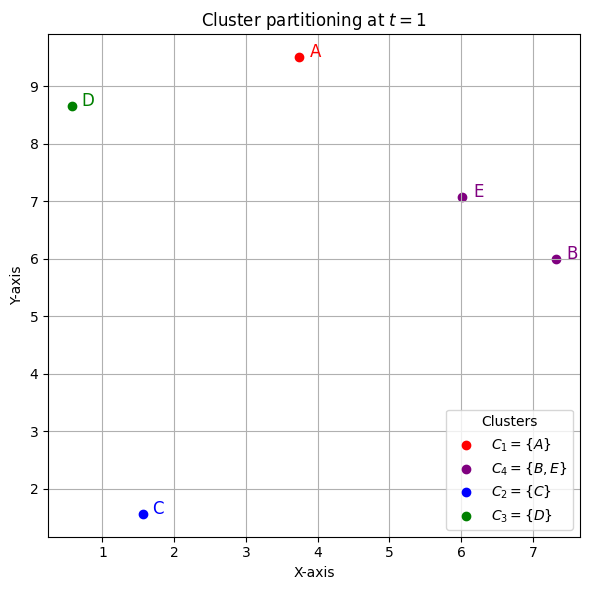

In [5]:
# List of colors for the 5 different clusters
colors = {'C_1': 'red', 'C_2': 'blue', 'C_3': 'green', 'C_4': 'purple', 'C_5': 'orange'}

x, y = coordinates[:, 0], coordinates[:, 1]

plt.figure(figsize=(6,6))

def get_cluster(target):
    for key, value in cluster2points.items():
        if target in value:
            return key
    return None

# To ensure we add each cluster only once to the legend
handled_clusters = set()
# Labeling the points A, B, C, D, E, with adjusted position and different color
for i, label in enumerate(['A', 'B', 'C', 'D', 'E']):
    cluster_name = get_cluster(label)
    cluster_member = '\{' + ','.join(cluster2points[cluster_name]) + '\}'
    plt.scatter(x[i], y[i], color=colors[cluster_name])
    plt.text(coordinates[i, 0] + 0.3, coordinates[i, 1] + 0, label, color=colors[cluster_name], fontsize=12, ha='right')
    # Only add the cluster label to the legend once
    if cluster_name not in handled_clusters:
        plt.scatter([], [], color=colors[cluster_name], label=f'${cluster_name}={cluster_member}$')
        handled_clusters.add(cluster_name)
        
# Adding grid and labels
plt.title("Cluster partitioning at $t=1$")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)

plt.legend(title="Clusters", loc="lower right")

# 去掉两侧的空白
plt.tight_layout()  # 自动调整子图参数以使图像更紧凑
plt.savefig('output/hierarchy-fig3.png', bbox_inches='tight')

# Show the plot
plt.show()

{'C_1': ['C'], 'C_2': ['B', 'E'], 'C_3': ['A', 'D']}


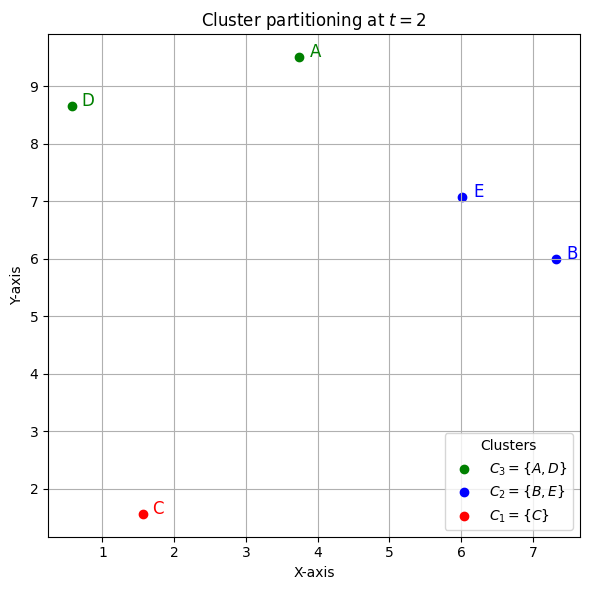

In [6]:
# 使用层次聚类进行聚类
point_labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E'}
cluster2points = agglomerative_clustering(coordinates,point_labels, k=3)
print(cluster2points)

# List of colors for the 5 different clusters
colors = {'C_1': 'red', 'C_2': 'blue', 'C_3': 'green', 'C_4': 'purple', 'C_5': 'orange'}

x, y = coordinates[:, 0], coordinates[:, 1]

plt.figure(figsize=(6,6))

def get_cluster(target):
    for key, value in cluster2points.items():
        if target in value:
            return key
    return None

# To ensure we add each cluster only once to the legend
handled_clusters = set()
# Labeling the points A, B, C, D, E, with adjusted position and different color
for i, label in enumerate(['A', 'B', 'C', 'D', 'E']):
    cluster_name = get_cluster(label)
    cluster_member = '\{' + ','.join(cluster2points[cluster_name]) + '\}'
    plt.scatter(x[i], y[i], color=colors[cluster_name])
    plt.text(coordinates[i, 0] + 0.3, coordinates[i, 1] + 0, label, color=colors[cluster_name], fontsize=12, ha='right')
    # Only add the cluster label to the legend once
    if cluster_name not in handled_clusters:
        plt.scatter([], [], color=colors[cluster_name], label=f'${cluster_name}={cluster_member}$')
        handled_clusters.add(cluster_name)
        
# Adding grid and labels
plt.title("Cluster partitioning at $t=2$")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)

plt.legend(title="Clusters", loc="lower right")

# 去掉两侧的空白
plt.tight_layout()  # 自动调整子图参数以使图像更紧凑
plt.savefig('output/hierarchy-fig4.png', bbox_inches='tight')

# Show the plot
plt.show()

{'C_1': ['C'], 'C_2': ['B', 'E', 'A', 'D']}


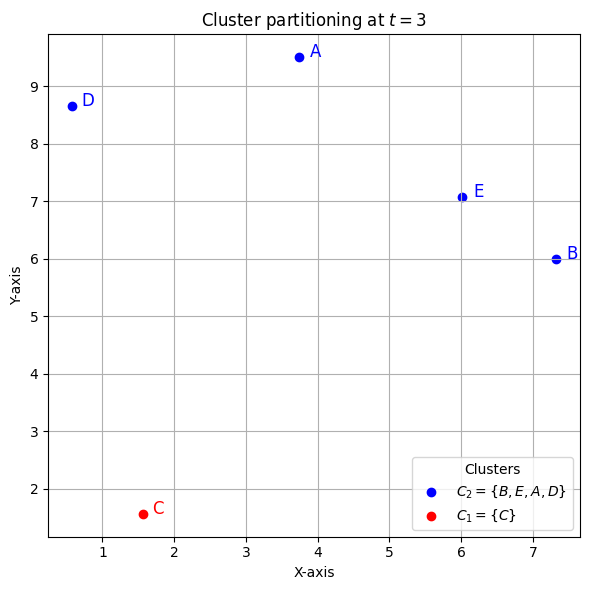

In [7]:
# 使用层次聚类进行聚类
point_labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E'}
cluster2points = agglomerative_clustering(coordinates,point_labels, k=2)
print(cluster2points)

# List of colors for the 5 different clusters
colors = {'C_1': 'red', 'C_2': 'blue', 'C_3': 'green', 'C_4': 'purple', 'C_5': 'orange'}

x, y = coordinates[:, 0], coordinates[:, 1]

plt.figure(figsize=(6,6))

def get_cluster(target):
    for key, value in cluster2points.items():
        if target in value:
            return key
    return None

# To ensure we add each cluster only once to the legend
handled_clusters = set()
# Labeling the points A, B, C, D, E, with adjusted position and different color
for i, label in enumerate(['A', 'B', 'C', 'D', 'E']):
    cluster_name = get_cluster(label)
    cluster_member = '\{' + ','.join(cluster2points[cluster_name]) + '\}'
    plt.scatter(x[i], y[i], color=colors[cluster_name])
    plt.text(coordinates[i, 0] + 0.3, coordinates[i, 1] + 0, label, color=colors[cluster_name], fontsize=12, ha='right')
    # Only add the cluster label to the legend once
    if cluster_name not in handled_clusters:
        plt.scatter([], [], color=colors[cluster_name], label=f'${cluster_name}={cluster_member}$')
        handled_clusters.add(cluster_name)
        
# Adding grid and labels
plt.title("Cluster partitioning at $t=3$")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)

plt.legend(title="Clusters", loc="lower right")

# 去掉两侧的空白
plt.tight_layout()  # 自动调整子图参数以使图像更紧凑
plt.savefig('output/hierarchy-fig5.png', bbox_inches='tight')

# Show the plot
plt.show()

{'C_1': ['C', 'B', 'E', 'A', 'D']}


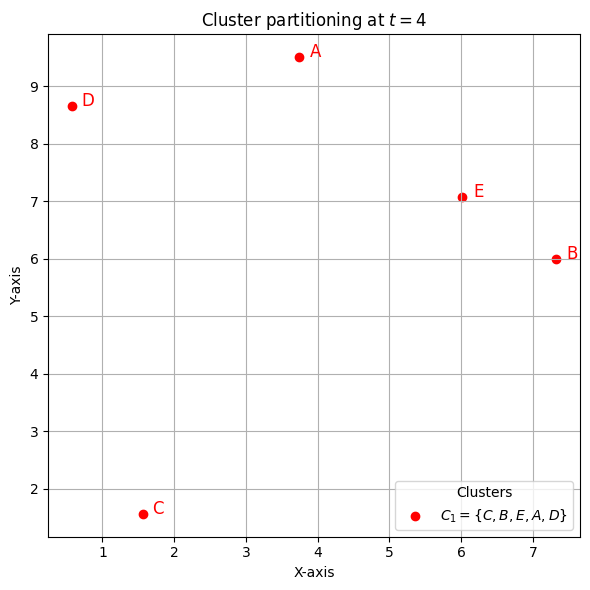

In [8]:
# 使用层次聚类进行聚类
point_labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E'}
cluster2points = agglomerative_clustering(coordinates,point_labels, k=1)
print(cluster2points)

# List of colors for the 5 different clusters
colors = {'C_1': 'red', 'C_2': 'blue', 'C_3': 'green', 'C_4': 'purple', 'C_5': 'orange'}

x, y = coordinates[:, 0], coordinates[:, 1]

plt.figure(figsize=(6,6))

def get_cluster(target):
    for key, value in cluster2points.items():
        if target in value:
            return key
    return None

# To ensure we add each cluster only once to the legend
handled_clusters = set()
# Labeling the points A, B, C, D, E, with adjusted position and different color
for i, label in enumerate(['A', 'B', 'C', 'D', 'E']):
    cluster_name = get_cluster(label)
    cluster_member = '\{' + ','.join(cluster2points[cluster_name]) + '\}'
    plt.scatter(x[i], y[i], color=colors[cluster_name])
    plt.text(coordinates[i, 0] + 0.3, coordinates[i, 1] + 0, label, color=colors[cluster_name], fontsize=12, ha='right')
    # Only add the cluster label to the legend once
    if cluster_name not in handled_clusters:
        plt.scatter([], [], color=colors[cluster_name], label=f'${cluster_name}={cluster_member}$')
        handled_clusters.add(cluster_name)
        
# Adding grid and labels
plt.title("Cluster partitioning at $t=4$")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)

plt.legend(title="Clusters", loc="lower right")

# 去掉两侧的空白
plt.tight_layout()  # 自动调整子图参数以使图像更紧凑
plt.savefig('output/hierarchy-fig6.png', bbox_inches='tight')

# Show the plot
plt.show()

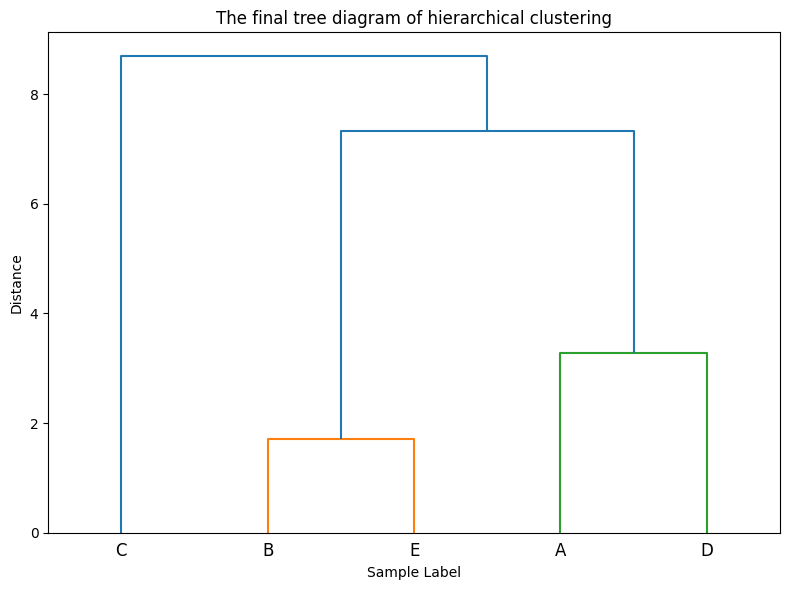

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 自定义标签
point_labels = ['A', 'B', 'C', 'D', 'E']

# 计算层次聚类（使用欧几里得距离）
Z = linkage(coordinates, method='ward')  # 'ward'方法计算最小化簇内方差

# 绘制树状图（Dendrogram），使用自定义的标签
plt.figure(figsize=(8, 6))
dendrogram(Z, labels=point_labels)  # 将 labels 设置为自定义的标签

# 添加标题和标签
plt.title("The final tree diagram of hierarchical clustering")
plt.xlabel("Sample Label")
plt.ylabel("Distance")

# 去掉两侧的空白
plt.tight_layout()  # 自动调整子图参数以使图像更紧凑
plt.savefig('output/hierarchy-fig7.png', bbox_inches='tight')
# 显示图像
plt.show()